In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
data = pd.read_csv('../Movie Recommendations/movies.csv')
data.shape

(27278, 3)

In [3]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [5]:
movies = data['movieId'].unique().tolist()
len(movies)

27278

In [6]:
ratings_data = pd.read_csv('../Movie Recommendations/ratings.csv')
ratings_data.shape

(1048575, 4)

In [7]:
ratings_data.describe()

,userId,movieId,rating,timestamp
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.527086e+03,8.648988e+03,3.529272e+00,1.096036e+09
std,2.018424e+03,1.910014e+04,1.051919e+00,1.594899e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,8.254999e+08
25%,1.813000e+03,9.030000e+02,3.000000e+00,9.658382e+08
50%,3.540000e+03,2.143000e+03,4.000000e+00,1.099263e+09
75%,5.233000e+03,4.641000e+03,4.000000e+00,1.217407e+09
max,7.120000e+03,1.306420e+05,5.000000e+00,1.427764e+09


In [8]:
ratings_data['rating'].min()

0.5

In [9]:
ratings_data['rating'].max()

5.0

In [10]:
data.shape

(27278, 3)

In [11]:
data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [15]:
ratings_data.shape

(1048575, 4)

In [16]:
ratings_data.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [17]:
tags_data = pd.read_csv('../Movie Recommendations/tags.csv')
tags_data.shape

(465564, 4)

In [18]:
tags_data.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [19]:
tags_data = tags_data.dropna()

In [20]:
tags_data.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [21]:
unique_tags = tags_data['tag'].unique().tolist()
len(unique_tags)

38643

In [22]:
drama_movies = data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [23]:
drama_movies.shape

(27278,)

In [24]:
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [25]:
comedy_movies.shape

(27278,)

In [26]:
tag_search = tags_data['tag'].str.contains('dark')
tags_data[tag_search].head()

,userId,movieId,tag,timestamp
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
4,65,592,dark hero,1368150078
21,65,6874,dark hero,1368150079
51,121,778,dark comedy,1300852846


In [27]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [28]:
del ratings_data['timestamp']

In [29]:
ratings_data.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [30]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
movies_data_ratings_data = data.merge(ratings_data, on = 'movieId', how = 'inner')
movies_data_ratings_data.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [32]:
high_rated = movies_data_ratings_data['rating']>4.0
movies_data_ratings_data[high_rated].head()

,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0


In [33]:
low_rated = movies_data_ratings_data['rating']<4.0
movies_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0


In [34]:
unique_genre = data['genres'].unique().tolist()
len(unique_genre)

1342

In [35]:
most_rated = movies_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head()

title
Pulp Fiction (1994)                 3498
Forrest Gump (1994)                 3476
Silence of the Lambs, The (1991)    3247
Shawshank Redemption, The (1994)    3216
Jurassic Park (1993)                3129
dtype: int64

In [36]:
data[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [37]:
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [38]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s]=0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [39]:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [40]:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

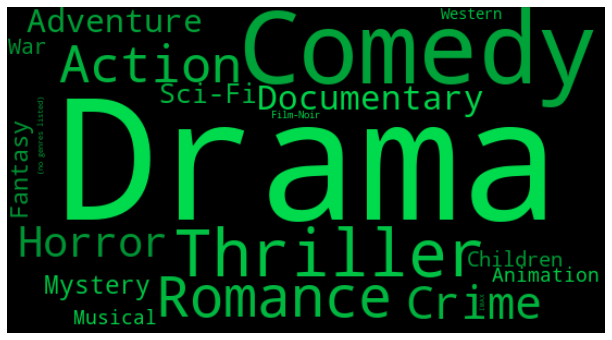

In [52]:
def random_color_func(word = None, font_size = None, position = None, orientation = None, font_path = None, random_state = None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100
f, ax = plt.subplots(figsize=(14,6))
wordcloud = WordCloud(width = 550, height = 300, background_color = 'black',max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

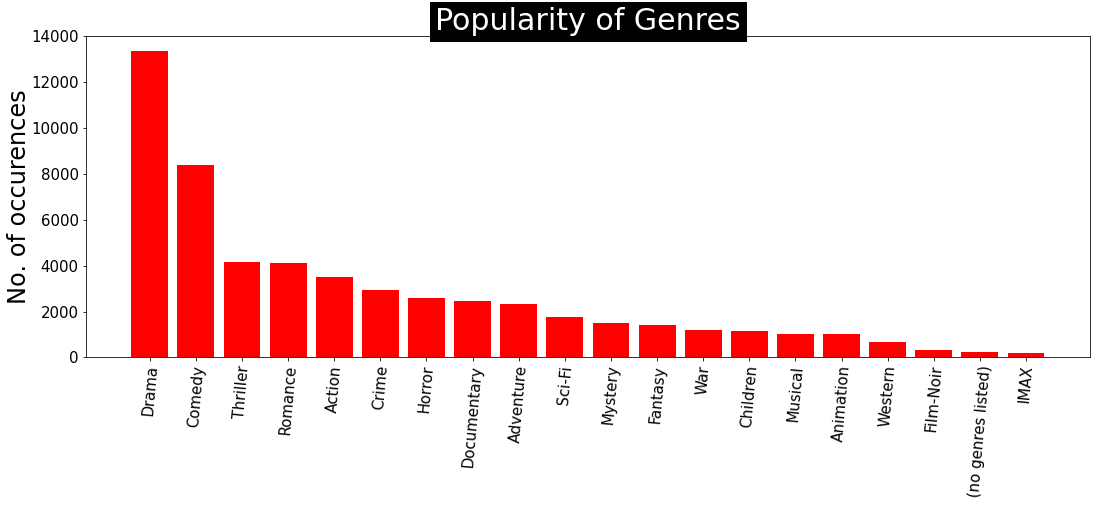

In [54]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()